# 一元线性回归(一个自变量)
## 如何提高预测准确性?

* 对于某只股票Y, 随机抽取到了15个月末价格
* 如何预测Y的下个月末价格?

In [ ]:
import pandas as pd
data = pd.read_excel('9 回归分析.xlsx', sheet_name='股票价格数据')
y = data['股票价格']
y

In [ ]:
# 用已知数据的均值, 作为预测值:
y.mean()

In [ ]:
# 已知数据与均值(naive的预测值)的误差是多少?
y - y.mean()

In [ ]:
# (被解释变量的)总离差平方和(SST)
SST = ((y - y.mean())**2).sum()
SST

## 线性回归模型

* 已知其他数据时(例如, 同期的沪深300指数数据), 可用改进预测吗?

In [ ]:
data[['股票价格','沪深300指数']]

* 总体
  * 在一个总体中, 每个被试(个体)有两个重要属性(股票价格、沪深300指数), 分别用变量y, x表示
  * 线性回归模型: 
      * 假设总体的y, x满足线性回归方程: y = α + β*x + ε (总体参数用希腊字母表示)
      * 随机产生的误差项ε = y-α-β*x, 假设随机变量ε的均值为0、标准差为σ
* 样本
  * 从总体中随机独立抽取n个被试(如n=15)
  * 使用一种估计方法(例如,最小二乘法)得到总体参数α、β的估计值a、b(样本统计量)
  * 得出估计值a、b后, 可得n个y的估计值 $\hat y=a+b*x$, 可得n个残差 $e=y-\hat y=y-a-b*x$
  * 注意, 若抽取得到另外一个样本(另一批n=15个被试), 估计值a、b会随之变化

## 最小二乘法
* 当n个残差的平方和 $Σe^2=Σ(y-a-b*x)^2$ 最小化时, a、b的取值

In [ ]:
y = data['股票价格']
x = data['沪深300指数']
def fun(b):      #  b[0]代表a, b[1] 代表b
    return  ((y-b[0]-b[1]*x)**2).sum()  # 返回n个残差的平方和 
from scipy import optimize 
optimize.fmin(fun,[3000,1])   # 设置初始点[3000,1]，寻找b值,使得函数fun(b) 极小化

In [ ]:
# 一元线性回归
import statsmodels.formula.api as smf
result = smf.ols(formula = '股票价格 ~ 沪深300指数', data = data).fit()
result.summary()

In [ ]:
# 画图
import matplotlib.pylab as plt
plt.scatter(x,y)

In [ ]:
y_hat = result.fittedvalues  # 回归预测值ŷ
plt.scatter(x,y)   # 画散点(原始数据)
plt.plot(x,y_hat)  # 画折现(预测数据)

In [ ]:
y_error = result.resid  # 回归预测残差e
plt.scatter(x,y_error)  # 残差图

In [ ]:
plt.scatter(y,y_error)  # 残差图

## 回归方程的显著性检验
* 问题
  * y随x发生变化吗? 相关性存在吗? 
  * 线性回归方程显著吗? y的回归部分(预测部分)α+β*x大于误差部分ε吗?
  * 原假设: β=0, y不随x变化, 线性回归方程不显著
  * 备择假设: β≠0, y随x变化, 线性回归方程显著
* 用样本推断总体
  * 直观地看, 样本的n个残差e的频数分布, 应与总体的误差ε的概率分布相似(可画图比较)
  * 严谨地看, 可构造统计量
  $$ F分数=\frac{MS_{回归}}{MS_{残差}} =\frac{SS_{回归}\ /\ df1_{回归}}{SS_{残差}\ /\ df2_{残差}} $$
  * F分数服从F分布(df1,df2)
    * 其中, df1=自变量个数, df2=n-待估参数个数=n-自变量个数-1(代表截距)
    * 若F分数处在依据显著水平α(如0.05)设置的拒绝域(在右尾)
    * 此时, 拒绝原假设: 回归系数b=0, 接受备择假设: 回归系数b≠0、回归方程显著
  * 可根据所得样本F分数计算p值
    * p值: 原假设正确时, 统计量高于所得样本F分数的概率, 右尾)
    * 若p值<显著水平α(如0.05), 则拒绝原假设
  * 参照excel文档

In [ ]:
result.rsquared  #决定系数、r方

In [ ]:
result.fvalue  # F分数

In [ ]:
result.f_pvalue   # F分数对应的p值

# 对变量取对数
* x=0时, y=截距=-136.0560, 股票价格y可用取负数吗?
* 股票价格y服从正态分布吗?

In [ ]:
plt.scatter(x,y)

* 增长率的定义
    * 变量的百分比增长率 $\large{i=\frac{Δy}{y_0}=\frac{y_1 - y_0}{y_0}=\frac{y_1}{y_0}-1}$
    * 变量的对数增长率 $\large{r=log(\frac{y_1}{y_0})}$
* 例子
    * 变量y从20增长到25时, 百分比增长率=25/20-1=0.25, 对数增长率=log(25/20)=0.2231
    * 变量x从3000增长到3010时, 百分比增长率=3010/3000-1=0.00333, 对数增长率=log(3010/3000)=0.00332
    * 当两个增长率的数值很小时, 对数增长率≈百分比增长率
* 已知增长率计算$y_1$、Δy

    * 已知百分比增长率i,可得$\large{y_1=y_0×(1+i)}$ , $\large{Δy=y_0×i}$
    * 已知对数增长率r,可得$\large{y_1=y_0×e^r}$ , $\large{Δy=y_0×(e^r-1)}$

## y = α + β*x + ε
* 被解释变量为y, 解释变量为x, y与x之间是线性关系

In [ ]:
result.params

* 解释变量系数b的含义
    * x(沪深300指数)变化1: $x_0→x_1$, $Δx=x_1-x_0=1$
    * y(股票价格)变化0.051639: $y_0→y_1$, $Δy=y_1-y_0=(a+b*(x_0+Δx))-(a+b*x_0)=b=0.051639$
    * x变动绝对量1, 则y变动绝对量b

## log(y) = α + β*x + ε
* 被解释变量为log(y), 解释变量为x, log(y)与x之间仍然是线性关系

In [ ]:
import numpy as np
import statsmodels.formula.api as smf
result_ylog = smf.ols(formula = 'np.log(股票价格) ~ 沪深300指数', data = data).fit()
result_ylog.summary()

In [ ]:
result_ylog.params

* 解释变量的系数b的含义
    * x(沪深300指数)变化1,  $Δx=x_1-x_0=1$
    * $ log(y_1)-log(y_0)=log(\frac{y_1}{y_0})=(a+b*(x_0+Δx))-(a+b*x_0)=b=0.002044$
    * 解释变量的系数b是(x变化1时)y的对数增长率, 由$log(\frac{y_1}{y_0})=b$, 可得$y_1=y_0×e^b$
    * x变动绝对量1，则y有b的对数增长(若数值较小, 对数增长率b近似百分比增长率)

##  y = α + β*log(x) + ε
* 被解释变量为y, 解释变量为log(x), y与log(x)之间仍然是线性关系

In [ ]:
import numpy as np
import statsmodels.formula.api as smf
result_xlog = smf.ols(formula = '股票价格 ~ np.log(沪深300指数)', data = data).fit()
result_xlog.summary()

In [ ]:
result_xlog.params

* 解释变量的系数b的含义
    * x(沪深300指数)有100%的对数增长率, $log(\frac{x_1}{x_0})=1=100\% $, y变动1*163.54=163.54的绝对量
    * x(沪深300指数)有1%的对数增长率, $log(\frac{x_1}{x_0})=0.01$, y变动1%*163.54=1.6354的绝对量
    * x有1%的对数增长, 则y变动1%*b的绝对量

##  log(y) = α + β*log(x) + ε
* 被解释变量为log(y), 解释变量为log(x), log(y)与log(x)之间仍然是线性关系

In [ ]:
import numpy as np
import statsmodels.formula.api as smf
result_yxlog = smf.ols(formula = 'np.log(股票价格) ~ np.log(沪深300指数)', data = data).fit()
result_yxlog.summary()

In [ ]:
result_yxlog.params

* 解释变量的系数b的含义
    * x(沪深300指数)有100%的对数增长率, $log(\frac{x_1}{x_0})=1=100\% $, y有100%*6.48=648%的对数增长
    * x(沪深300指数)有1%的对数增长率, $log(\frac{x_1}{x_0})=0.01$, y有1%*6.48=6.48%的对数增长
    * x有1%的对数增长, 则y有1%*b的对数增长

## 小结
* y = α + β*x + ε,        x变动绝对量1, y变动绝对量b
* log(y) = α + β*x + ε,    x变动绝对量1，y有b的对数增长, b被称为y对x的半弹性
* y = α + β*log(x) + ε,    x有1%的对数增长, y变动1%*b的绝对量
* log(y) = α + β*log(x) + ε,  x有1%的对数增长, y有1%*b的对数增长, b被称为y对x的弹性

# 多元线性回归(多个自变量)
## 为什么要加入其他变量(控制变量)?

In [ ]:
import pandas as pd
data = pd.read_excel('9 回归分析.xlsx', sheet_name='Florida_crime')
data

In [ ]:
# 一元线性回归
import statsmodels.formula.api as smf
result1 = smf.ols(formula = 'crime_rate ~ percent_completing_high_school', data = data).fit()
result1.summary()

* 高中毕业率越高, 犯罪率越高, 为什么?
* 可能的解释
    * 在美国佛罗里达州各县, 城市化率越高, 高中毕业率越高
    * 同时, 城市化率越高, 犯罪率也越高
    * 因而能够观察到: 高中毕业率与犯罪率正相关
    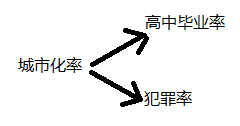

## 解决方法
* 将城市化率加入模型, 作为犯罪率的解释变量

In [ ]:
# 多元线性回归
import statsmodels.formula.api as smf
result2 = smf.ols(formula = 'crime_rate ~ percent_completing_high_school + percent_urban', 
                 data = data
                 ).fit()
result2.summary()

* 在这个多元回归模型中, 解释变量"城市化率"是一个"控制变量", 可得到: 
    * "城市化率"不变的情况下, "高中毕业率"对"犯罪率"的影响
    *  经其他自变量调整后, "高中毕业率"对"犯罪率"的净影响(偏回归系数) 

## 基于pingouin包的回归
* https://pingouin-stats.org/generated/pingouin.linear_regression.html#pingouin.linear_regression

In [ ]:
import pingouin as pg
result4 = pg.linear_regression(X=data[['percent_completing_high_school', 'percent_urban']], y=data['crime_rate'])
result4

# 自变量是分类变量

In [ ]:
import pandas as pd
data = pd.read_excel('9 回归分析.xlsx', sheet_name='student-survey')
data

In [ ]:
# 将男性调整为'0_male'(作为基期), 女性调整为 '1_female'
data['ge_gender'][data.ge_gender=='f'] = '1_female'    # DataFrame[列名][行筛选条件]
data.loc[data.ge_gender=='m','ge_gender'] = '0_male'   # DataFrame.loc[行,列]  , 推荐使用这一方法
# 修改政党属性数据标识, 方便识别
data.loc[data.pa_political_affiliation=='d','pa_political_affiliation'] = 'Democrat' 
data.loc[data.pa_political_affiliation=='r','pa_political_affiliation'] = 'Republican' 
data.loc[data.pa_political_affiliation=='i','pa_political_affiliation'] = 'Independent' 
data[['ge_gender','pa_political_affiliation']]

## 自变量是一个分类变量
* 结果等价于单因素方差分析
* 方差分析可看作回归分析的特殊形态

In [ ]:
#  大学成绩 与 政党属性的关系
result1 = smf.ols(formula = 'co_college_GPA ~  C(pa_political_affiliation)', data = data).fit()
# C()指定为分类变量. 如果分类变量是数字,必须用C()来指定.如果分类变量是字符串,可以自动识别, 不需要C()来指定  
result1.summary()

* pa_political_affiliation变量有3个取值, 被拆分成2个变量(3-1). 系统自动指定第一个取值'Democrat'为"基组"(字母表中排在最前面)
* 相对于基组而言, Independent组的截距高出-0.2119(斜率不变), 在0.05水平上显著(p值小于0.05), 独立党成员的大学分数低于民主党
* 相对于基组而言, Republican组的截距高出-0.0952(斜率不变), 在0.05水平上不显著(p值大于0.05), 民主党成员的大学分数类似民主党

In [ ]:
# 输出方差分析表
from statsmodels.stats import anova
anova.anova_lm(result1)

* 整体来看, 不同政党属性的大学分数无显著差异(p值>0.05)

## 自变量是多个分类变量
* 结果等价于多因素方差分析

In [ ]:
#  大学成绩 与 政党属性、性别的关系
result2 = smf.ols(formula = 'co_college_GPA ~  C(pa_political_affiliation) +  C(ge_gender)', 
                  data = data).fit()
result2.summary()

* 加入性别因素, 会影响政党属性因素的结果 
* ge_gender变量有2个取值, 被拆分成1个变量(2-1). 系统自动指定第一个取值'0_male'为"基组"(字母表中排在最前面)
* 相对于基组而言, 1_female组的截距高出0.1637(斜率不变), 在0.05水平上不显著(p值大于0.05), 女性的大学分数与男性无显著差异

In [ ]:
# 输出方差分析表
from statsmodels.stats import anova
anova.anova_lm(result2)
# 两个因素都不显著

## 自变量是分类变量+连续变量
* 这种回归模型, 也叫协方差分析
* 协方差分析中, 协变量(控制变量)是连续变量

In [ ]:
#  大学成绩 与 政党属性、性别、高中成绩的关系
result3 = smf.ols(formula = 'co_college_GPA ~  C(pa_political_affiliation) +  C(ge_gender) + hi_high_school_GPA', 
                  data = data).fit()
result3.summary()

* 以"高中成绩"为协变量(控制变量), 在本例中不改变主要分析结论

In [ ]:
# 输出方差分析表
from statsmodels.stats import anova
anova.anova_lm(result3)
# 两个分类都不显著, 连续变量显著

# 逻辑回归Logistic Regression(因变量是二值分类变量)
## 基本原理
* 因变量(被解释变量)是二值分类变量的情况
    * 法院的审判结果: 有罪, 无罪
    * 考研的结果: 考上, 没考上
    * 宗教信仰: 有宗教信仰, 无宗教信仰
    * 本例的问题: 大学成绩、性别等因素, 是否影响人的宗教信仰?
* 逻辑回归的原理
    * 逻辑回归（Logistic Regression）可用于对发生概率建模，解决被解释变量的二分类问题。
    * 本例的被解释变量“是否有宗教信仰”为二分类变量，记“有宗教信仰”为y=1、**发生概率**为p，记“无宗教信仰”为y=0、发生概率为(1-p)
    * 可建立逻辑归回模型： $Log( \frac{p}{1-p}) = β0 + β1 * x1 + β2 * x2 $
    * 其中，$\frac{p}{1-p}$为“有宗教信仰”概率p对“无宗教信仰”概率(1-p)的比值、一般记为odds(**几率**、优势、比率、发生比)
    * $Log(\frac{p}{1-p}) = Log(odds) $也即**几率的自然对数**
    * 逻辑回归模型的解读
        * 形式上是"以二分类变量y为被解释变量"的**非线性模型**
        * 实质上是"以y=1的发生概率p为被解释变量"的**非线性模型**
        * 最终转化为以“几率的自然对数$Log( \frac{p}{1-p}) $”为被解释变量的**线性模型**
* 逻辑回归的参数
    * 记模型为: $Log( odds) = β0 + β1 * x1 + β2 * x2 $
    * β0，β1，β2为3个待估参数，x1，x2代表2个解释变量
    * 当x1变动为x1+1(变动一个单位)时, 旧odds与新odds'的关系为: 
        * $ odds'/odds =  e^{β1}$  , 或者  $ odds' = odds * e^{β1}$  
    * 因而, 一般记 odds'/odds 为 OR (odds ratio, **几率比**、优势比、比率比、发生比的比值), 是新几率odds'对原几率odds的倍数
    * 自变量X1变动绝对量1，几率odds有β1的对数增长(若数值较小,对数增长率β1近似百分比增长率): 
        * 系数β1 >0, OR就大于1, 新几率就超过原几率, 概率p就增加
        * 系数β1 <0, OR就小于1, 新几率就低于原几率, 概率p就减小

## 基于statsmodels包的逻辑回归

### 导入、整理数据
* y必须事先转换为二分类数值(进行One-Hot编码、转换成0-1型数值变量)
* x可以包括字符变量(会自动处理成分类变量)

In [ ]:
import pandas as pd
data = pd.read_excel('9 回归分析.xlsx', sheet_name='student-survey')
data[['religion','co_college_GPA_100','ge_gender']]

In [ ]:
data = data[['religion','co_college_GPA_100','ge_gender']].dropna()  # 筛选出3列, 删除缺失数据的行
# 将男性调整为'0_male'(作为基期), 女性调整为 '1_female'
data['ge_gender'][data.ge_gender=='f'] = '1_female'    # DataFrame[列名][行筛选条件]
data.loc[data.ge_gender=='m','ge_gender'] = '0_male'   # DataFrame.loc[行,列]  , 推荐使用这一方法
data[['religion','co_college_GPA_100','ge_gender']]

In [ ]:
data['religion'].value_counts()

In [ ]:
# 原始数据
import matplotlib.pylab as plt
y = data['religion']
x1 = data['co_college_GPA_100']
plt.scatter(x1, y)

* 直接用线性模型拟合二分类变量的缺陷:
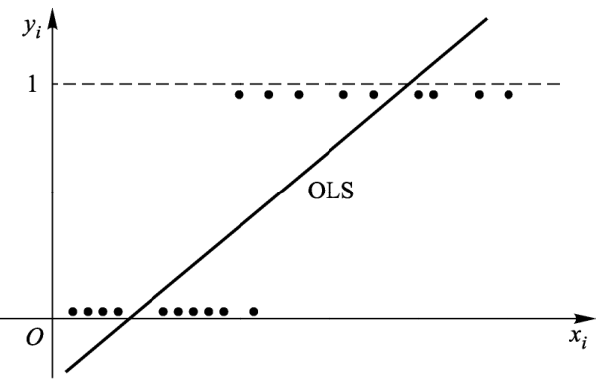

### 拟合模型
* 二分类变量religion是被解释变量
* 得到的预测值, 是religion=1的预测概率p

In [ ]:
import statsmodels.formula.api as smf
result_logit = smf.logit(formula = 'religion ~ co_college_GPA_100 + ge_gender ', data=data).fit()
result_logit.summary()

In [ ]:
np.exp(-0.0896)-1


* 拟合模型的拟合优度不高（Pseudo R2为0.09744），
* 在显著水平0.05上, 模型不显著; 在显著水平0.10上, 模型显著(基于极大似然估计的LLR p-value为0.07411)
    * 注意, 逻辑回归模型的参数估计, 基于极大似然法, 而非最小二乘法
* co_college_GPA_100的p值为0.079, 基于显著水平0.05则不显著, 基于显著水平0.10则显著
    * co_college_GPA_100的系数(coef)为-0.0896, 这意味着:
    * co_college_GPA_100每增长1分(总分为100)，新几率odds'就变动为原几率odds的0.914倍（$odds'/odds=e^{-0.0896}$倍），也即几率下降了8.6%(0.086)
    * 注意, 几率是“有宗教信仰”概率p对“无宗教信仰”概率(1-p)的比值；
    * 几率下降了8.6%，意味着“有宗教信仰”概率p下降，但下降幅度并非8.6%（概率p的边际效应不是恒定的）
    * 可以认为，随着co_college_GPA的增加，“有宗教信仰”的概率p随之下降
* ge_gender的p值为0.100、不显著, 性别不影响宗教信仰
    * ge_gender从男性(基组)变为女性(m组), 新几率odds'就变动为原几率odds的3.672倍（$odds'/odds=e^{1.3008}$倍），也即几率上升了267.2%(2.672)
    * 注意, 上述结果统计上不显著

In [ ]:
# 无宗教信仰、有宗教信仰的平均GPA
data[['religion','co_college_GPA_100']].groupby('religion').mean()

In [ ]:
# 男性、女性 有宗教信仰的人数占比
data[['religion','ge_gender']].groupby('ge_gender').mean()

### 预测的准确性

In [ ]:
# 注意, 逻辑回归得到的预测值, 是"y=1"的预测概率p
result_logit.predict()

In [ ]:
# 原始数据、预测数据
plt.scatter(x1, y)
plt.scatter(x1, result_logit.predict())  

In [ ]:
# 选择0.50为阈值
# 预测概率p<0.50时判定为False(0), 预测概率p>0.50时判定为True(1)
pred = result_logit.predict()> 0.50
pred

In [ ]:
# 混淆矩阵: 实际值(0-1)与预测值(False-True)
pd.crosstab(pred,y, rownames=['Predicted'], colnames=['Actual'])

* 选择0.50为阈值, 合适吗?

## 基于sklearn包的逻辑回归

### 导入、整理数据
* y、x不可以包括字符变量(需手动处理成0-1型分类变量)

In [ ]:
# 事先准备好y, x
import pandas as pd
data = pd.read_excel('9 回归分析.xlsx', sheet_name='student-survey') # 读取数据
data = data[['religion','co_college_GPA_100','ge_gender']].dropna()  # 筛选出3列, 删除缺失数据的行
y = data['religion']
# 分类变量做onehot编码: 将k个取值的因素转换位k-1个变量, 将字符取值转换为0-1取值
X_one_hot = pd.get_dummies(data[['co_college_GPA_100', 'ge_gender']]  , drop_first=True) 
X_one_hot

### 拟合模型

In [ ]:
from sklearn.linear_model import LogisticRegression
model_LR =  LogisticRegression(C=1e10)  # 建立逻辑回归模型
#  C=1e10 让惩罚项非常接近0 ,默认有截距 fit_intercept=True,
model_LR.fit(X_one_hot, y)   #  根据数据拟合模型 

### 预测的准确性

In [ ]:
# 被解释变量y=0的预测概率, 被解释变量y=1的预测概率(p)
model_LR.predict_proba(X_one_hot) 

In [ ]:
# 被解释变量y=1的预测概率(p)
pred_p = model_LR.predict_proba(X_one_hot)[:, 1]  
pred_p

In [ ]:
# 以accuracy_score最大化为标准, 寻找最优的阈值
from sklearn import metrics
import numpy as np
for i in np.arange(0.15,0.95,0.01):
    pred = pred_p >  i
    print(i.round(2), metrics.accuracy_score(y, pred).round(4))

In [ ]:
# 根据上述结果, 选择0.64为阈值
# 预测概率p<0.64时判定为False(0), 预测概率p>0.64时判定为True(1)
pred = pred_p > 0.64
pred 

In [ ]:
# 混淆矩阵: 实际值(0-1)与预测值(False-True)
pd.crosstab(pred,y, rownames=['Predicted'], colnames=['Actual'])

In [ ]:
# 各种预测准确性指标
from sklearn import metrics
print(metrics.accuracy_score(y, pred))
print(metrics.classification_report(y, pred ))
print(metrics.cohen_kappa_score(y, pred))

* cohen_kappa_score: 模型的拟合性能
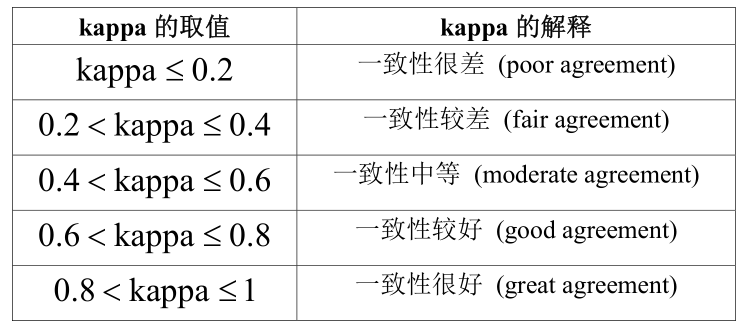

### ROC与AUC

In [ ]:
# 画ROC图
metrics.plot_roc_curve(model_LR, X_one_hot,y)

In [ ]:
metrics.roc_auc_score(y, pred_p)  # 根据y的实际值、y=1的预测概率pred_p, 计算AUC

* 变化阈值(如0.6-0.5-0.4)、随着negative推断更多地转向positive推断：
    * 真阳率一般也会上升，例如分子从24变为25
    * 假阳率一般会上升，例如分子从2变为3
    * 因而,ROC与X轴围成的面积AUC,可用来衡量模型的好坏
* ROC(曲线)与AUC(面积)
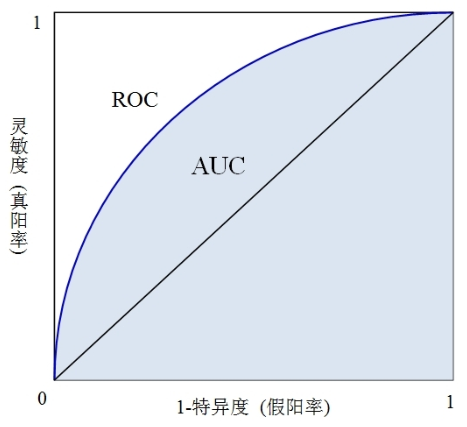

## 基于pingouin包的逻辑回归
* x不可以包括字符变量(需手动处理成0-1型分类变量)
* https://pingouin-stats.org/generated/pingouin.logistic_regression.html#pingouin.logistic_regression

In [ ]:
import pingouin as pg
result2 = pg.logistic_regression(X=X_one_hot, y=data['religion'])
result2.round(4)  # 输出时显示4位小数